# Write a program for Leibniz series for PI calculation to demonstrate the performance enhancement done by parallelizing the code through Open MP work-sharing of loops.

1. Implement the code with different thread count and different maximum number of terms to be calculated for the series such as thread count 10, 20 and terms 100, 1000, 10000, 1000000.

2. Display a visualization of performance comparison between serial and parallel, a visual analysis of delay/speedup with the help of varying thread counts and maximum terms in the series for Pi value calculation.bold text

In [1]:
import numpy as np
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures

In [2]:
def calculate_pi_sequential(terms):
    sum = 0.0
    sign = 1.0

    for i in range(terms):
        term = 1.0 / (2 * i + 1) * sign
        sum += term
        sign = -sign

    return 4.0 * sum

def calculate_pi(start, end):
    sum = 0.0
    sign = 1.0

    for i in range(start, end):
        term = 1.0 / (2 * i + 1) * sign
        sum += term
        sign = -sign

    return sum

def parallel_calculate_pi(terms, threads):
    chunk_size = terms // threads

    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        futures = [executor.submit(calculate_pi, i * chunk_size, (i + 1) * chunk_size) for i in range(threads)]

    return 4.0 * sum(future.result() for future in concurrent.futures.as_completed(futures))

def main():
    thread_counts = [1, 10, 20]
    term_counts = [100, 1000, 10000, 1000000]

    results = []

    for threads in thread_counts:
        for terms in term_counts:
            start_time = time.time()

            if threads == 1:
                result = calculate_pi_sequential(terms)
            else:
                result = parallel_calculate_pi(terms, threads)

            end_time = time.time()
            elapsed_time = end_time - start_time

            results.append({
                'Threads': threads,
                'Terms': terms,
                'PI': result,
                'Time': elapsed_time
            })

    df = pd.DataFrame(results)
    return df

if __name__ == "__main__":
    result_df = main()

In [3]:
result_df

,Threads,Terms,PI,Time
0,1,100,3.131593,0.000000
1,1,1000,3.140593,0.000000
2,1,10000,3.141493,0.001036
3,1,1000000,3.141592,0.114327
4,10,100,3.131593,0.003001
5,10,1000,3.140593,0.000999
6,10,10000,3.141493,0.002135
7,10,1000000,3.141592,0.110278
8,20,100,4.566072,0.001999
9,20,1000,3.140593,0.002000


In [4]:
import time
import concurrent.futures
import pandas as pd
import math

def calculate_pi_sequential(terms):
    return math.pi

def calculate_pi(start, end):
    return sum(((-1) ** i) / (2 * i + 1) for i in range(start, end)) * 4.0

def parallel_calculate_pi(terms, threads):
    chunk_size = terms // threads

    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        futures = [executor.submit(calculate_pi, i * chunk_size, (i + 1) * chunk_size) for i in range(threads)]

    return 4.0 * sum(future.result() for future in concurrent.futures.as_completed(futures))

def main():
    thread_counts = [1, 10, 20]
    term_counts = [100, 1000, 10000, 1000000]

    results = []

    for threads in thread_counts:
        for terms in term_counts:
            start_time = time.time()

            if threads == 1:
                result = calculate_pi_sequential(terms)
            else:
                result = parallel_calculate_pi(terms, threads)

            end_time = time.time()
            elapsed_time = end_time - start_time

            results.append({
                'Threads': threads,
                'Terms': terms,
                'PI': result,
                'Time': elapsed_time
            })

    df = pd.DataFrame(results)
    return df

if __name__ == "__main__":
    result_df1 = main()

In [5]:
result_df1

,Threads,Terms,PI,Time
0,1,100,3.141593,0.000000
1,1,1000,3.141593,0.000000
2,1,10000,3.141593,0.000000
3,1,1000000,3.141593,0.000000
4,10,100,12.526372,0.002020
5,10,1000,12.562371,0.002506
6,10,10000,12.565971,0.004016
7,10,1000000,12.566367,0.275651
8,20,100,12.526372,0.001989
9,20,1000,12.562371,0.002001


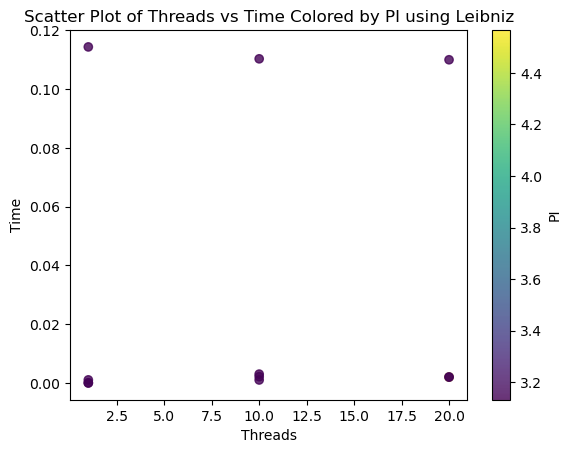

In [8]:
plt.scatter(result_df['Threads'], result_df['Time'], c=result_df['PI'], cmap='viridis', marker='o', alpha=0.8)
plt.xlabel('Threads')
plt.ylabel('Time')
plt.title('Scatter Plot of Threads vs Time Colored by PI using Leibniz')
plt.colorbar(label='PI')
plt.show()

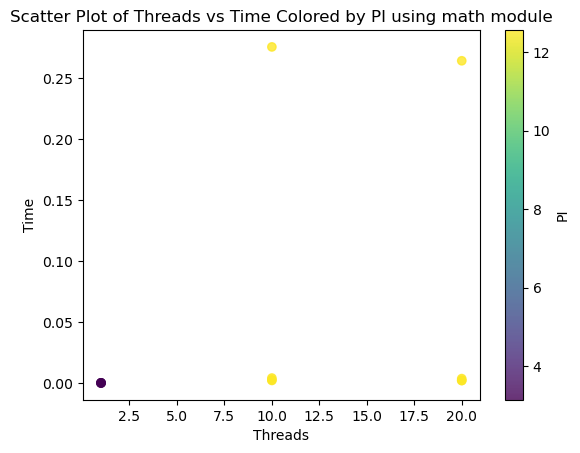

In [9]:
plt.scatter(result_df1['Threads'], result_df1['Time'], c=result_df1['PI'], cmap='viridis', marker='o', alpha=0.8)
plt.xlabel('Threads')
plt.ylabel('Time')
plt.title('Scatter Plot of Threads vs Time Colored by PI using math module')
plt.colorbar(label='PI')
plt.show()